In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
k1=1.0
k2=1.0
k3=1.0
m1=1.0
m2=1.0

In [5]:
def qdot(y):
  x1,x2=y[0],y[1]
  p1,p2=y[2],y[3]
    
  x1dot=p1/m1
  x2dot=p2/m2
    
  p1dot=-k1*x1+k2*(x2-x1)
  p2dot=-k3*x2-k2*(x2-x1)
    
  return np.asarray([x1dot,x2dot,p1dot,p2dot])

In [6]:


def paso_euler(f,t_n,y_n,dt):
    
  ydot=f(t_n, y_n)
  ynmas_1=y_n+dt*ydot
    
  return ynmas_1

In [7]:
def integrador_simple(f,t,y_0,dt):
  tiempo=time.time()

  t_0,t_f=t
  n=int((t_f-t_0)/dt)
  d=len(y_0)
  y_tray=np.zeros(((n+1),d))
  t=np.linspace(t_0,t_f,n+1)
  y_tray[0,:]=y_0
  tiempo=time.time()-tiempo
  for i in range(n):
    y_tray[i+1,:]=paso_euler(f,t[i],y_tray[i,:],dt)
  print("El tiempo de computo es = " + ("%.5f" %tiempo) + "s")
  return t, y_tray

In [8]:


def Q_Dot_t(t,y):
  return qdot(y)



### Al variar las condiciones iniciales

El tiempo de computo es = 0.00069s


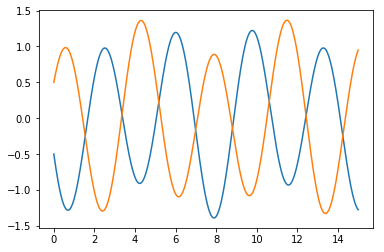

In [9]:
t,Q_Traj=integrador_simple(Q_Dot_t, [0,15],[-0.5,0.5,-2,1.5],0.001)
plt.plot(t,Q_Traj[:,0]);
plt.plot(t,Q_Traj[:,1]);



### Al variar parámetros y condiciones iniciales

In [10]:
k1=0.5
k2=0.7
k3=1.0
m1=0.5
m2=1.0

El tiempo de computo es = 0.00076s


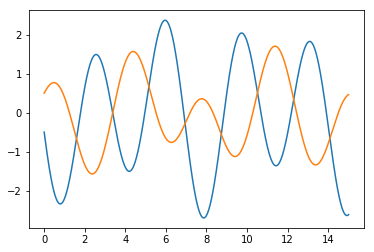

In [11]:
t,Q_Traj=integrador_simple(Q_Dot_t, [0,15],[-0.5,0.5,-2,1.0],0.001)
plt.plot(t,Q_Traj[:,0]);
plt.plot(t,Q_Traj[:,1]);

### Pa la energy del sistema

In [22]:
def energy(y,t):
    x1,x2=y[0],y[1]
    p1,p2=y[2],y[3]
    
    pot=[]
    E,V,T=[],[],[]
    
    for i in range(t):
        pot.append(i)
        T.append(p1/m1 + p2/m2)
        V.append((1/2)*k1*x1**2+(1/2)*(x2-x1)**2+(1/2)*k3*x2**2)
        en=T[i]+V[i]
        E.append(en)
        
    return E

In [23]:
y=[1.,0.,0.,0.]
energy(y,10)

[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]

La energía se conserva sin importar cuánto avance el tiempo.